<h1>STEP 1: Data Understanding & Data Loading

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("heart.csv")


In [ ]:
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape


(303, 14)

In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()


,count
target,
1,165
0,138


<h1>STEP 2: Data Cleaning & Preprocessing

In [ ]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.fillna(df.median(), inplace=True)


In [ ]:
X = df.drop('target', axis=1)
y = df['target']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
X_scaled.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


In [ ]:
print("Features shape:", X_scaled.shape)
print("Target shape:", y.shape)


Features shape: (303, 13)
Target shape: (303,)


<h1>STEP 3: Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


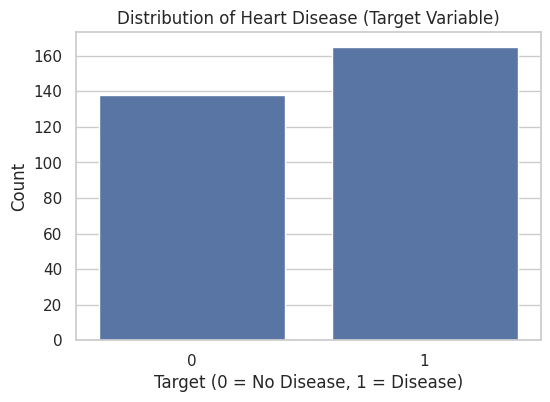

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease (Target Variable)")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


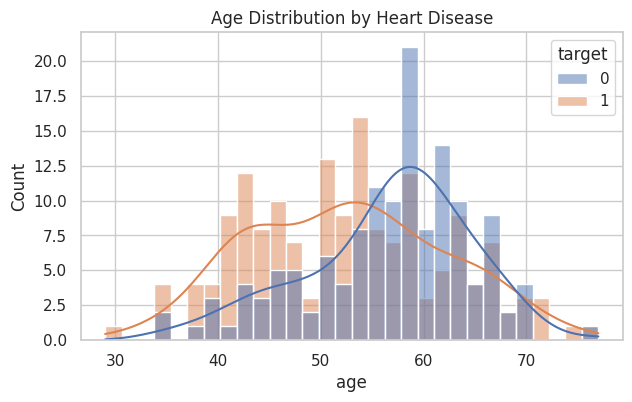

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='age', hue='target', bins=30, kde=True)
plt.title("Age Distribution by Heart Disease")
plt.show()


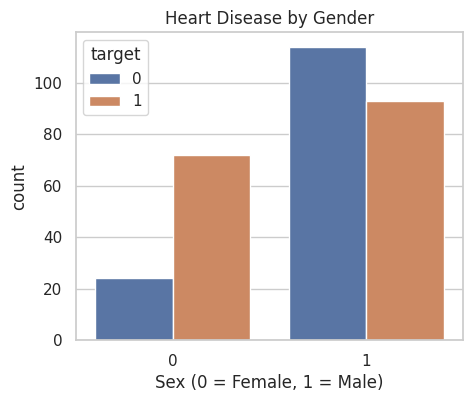

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.show()


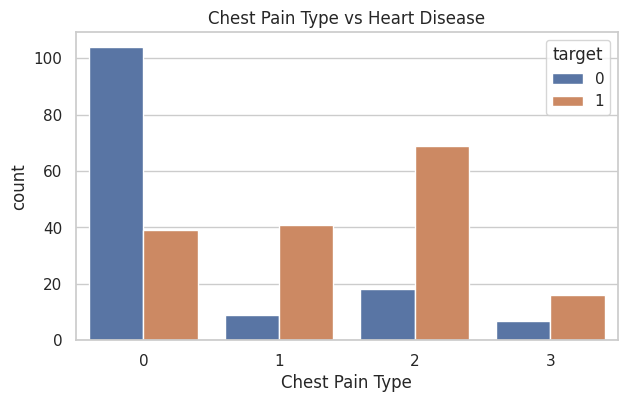

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.show()


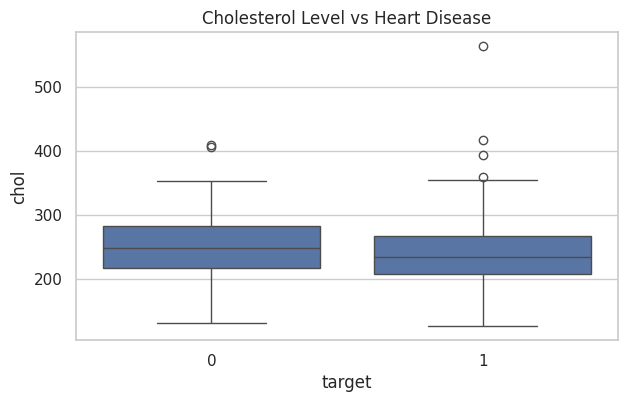

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol Level vs Heart Disease")
plt.show()


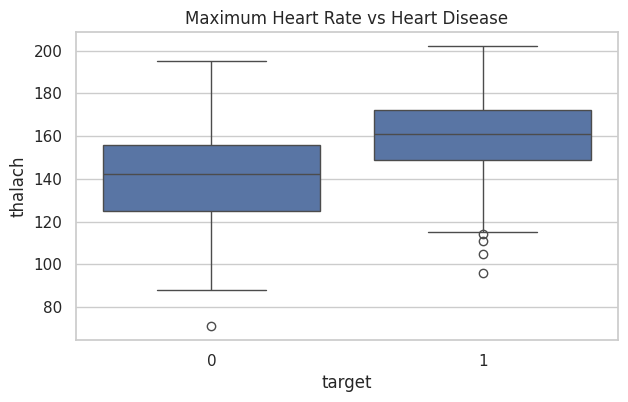

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.show()


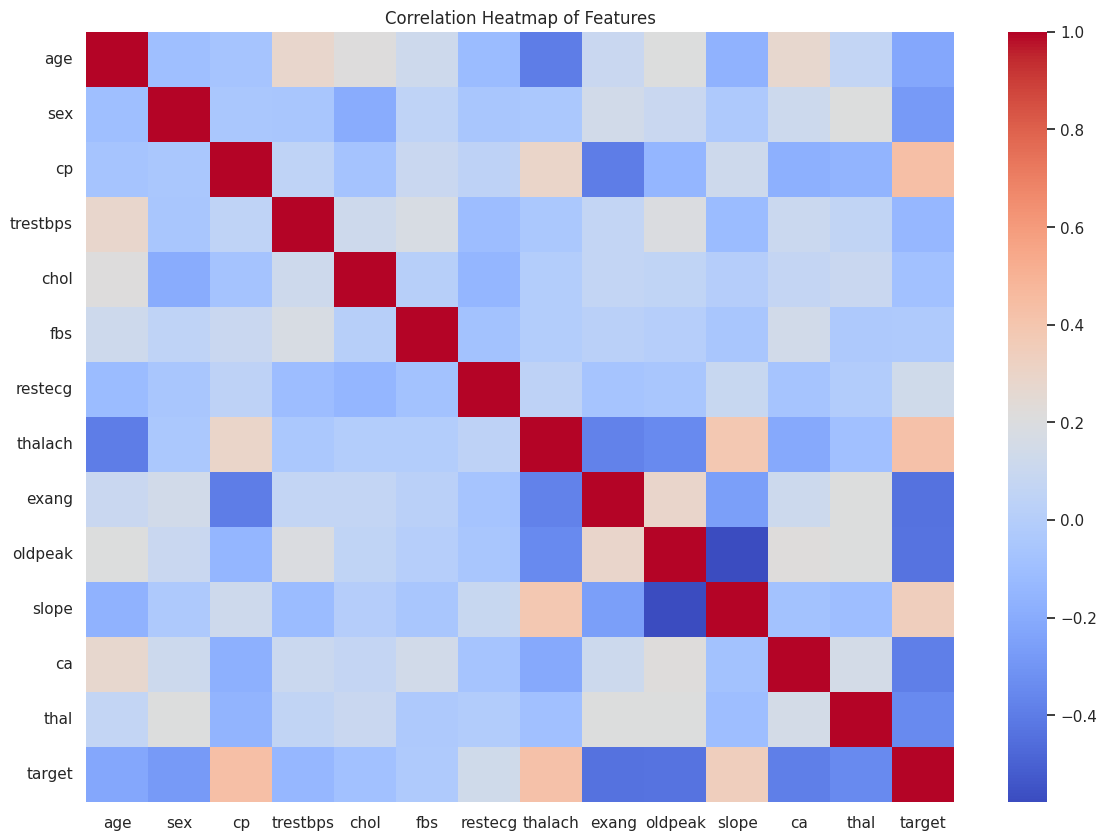

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()


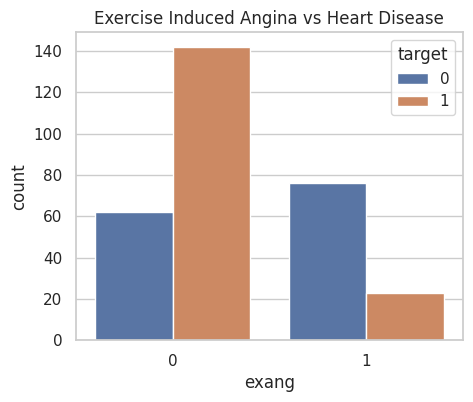

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='exang', hue='target', data=df)
plt.title("Exercise Induced Angina vs Heart Disease")
plt.show()


<h1>STEP 4: Model Building & Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=1000,
    random_state=42
)

nn_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

In [ ]:
print("Logistic Regression trained:", lr_model)
print("Decision Tree trained:", dt_model)
print("Random Forest trained:", rf_model)
print("Neural Network trained:", nn_model)


Logistic Regression trained: LogisticRegression(max_iter=1000)
Decision Tree trained: DecisionTreeClassifier(random_state=42)
Random Forest trained: RandomForestClassifier(random_state=42)
Neural Network trained: MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)


<h1>STEP 5: Model Evaluation & Performance Analysis

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve
)


In [ ]:
# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Decision Tree
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Random Forest
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Neural Network
y_pred_nn = nn_model.predict(X_test)
y_prob_nn = nn_model.predict_proba(X_test)[:, 1]


In [ ]:
def evaluate_model(y_test, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }


In [ ]:
results = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr, y_prob_lr),
    "Decision Tree": evaluate_model(y_test, y_pred_dt, y_prob_dt),
    "Random Forest": evaluate_model(y_test, y_pred_rf, y_prob_rf),
    "Neural Network": evaluate_model(y_test, y_pred_nn, y_prob_nn)
}).T

results


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.803279,0.769231,0.909091,0.833333,0.869048
Decision Tree,0.704918,0.702703,0.787879,0.742857,0.697511
Random Forest,0.836066,0.780488,0.969697,0.864865,0.909091
Neural Network,0.786885,0.794118,0.818182,0.805970,0.848485


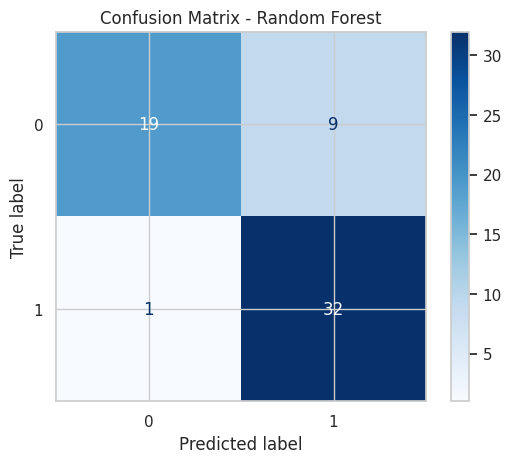

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


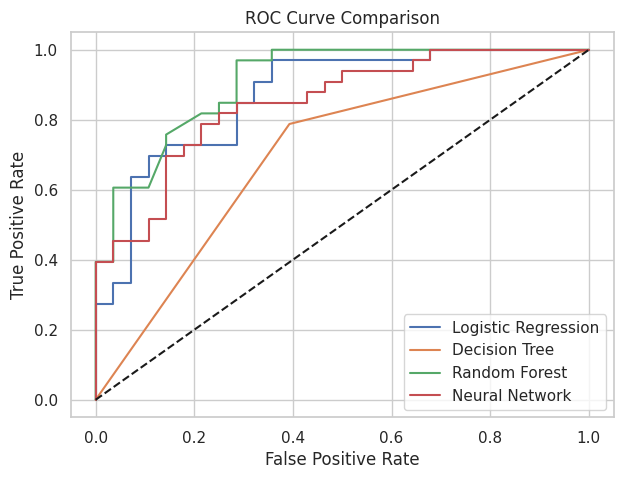

In [ ]:
plt.figure(figsize=(7,5))

for model_name, y_prob in zip(
    ["Logistic Regression", "Decision Tree", "Random Forest", "Neural Network"],
    [y_prob_lr, y_prob_dt, y_prob_rf, y_prob_nn]
):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
results.sort_values(by="ROC-AUC", ascending=False)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.836066,0.780488,0.969697,0.864865,0.909091
Logistic Regression,0.803279,0.769231,0.909091,0.833333,0.869048
Neural Network,0.786885,0.794118,0.818182,0.805970,0.848485
Decision Tree,0.704918,0.702703,0.787879,0.742857,0.697511


<h1>STEP 6: Feature Importance & Interpretation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
2,cp,0.157392
7,thalach,0.117491
9,oldpeak,0.113399
12,thal,0.107062
4,chol,0.087131
11,ca,0.086078
0,age,0.077759
3,trestbps,0.074127
10,slope,0.059454
8,exang,0.057655


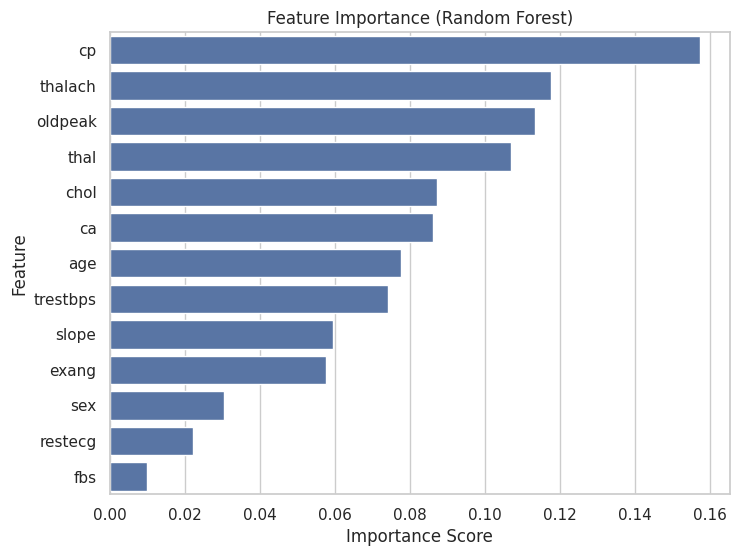

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
lr_coeff = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

lr_coeff


,Feature,Coefficient
2,cp,0.957943
7,thalach,0.558192
10,slope,0.305326
6,restecg,0.233569
0,age,0.015949
5,fbs,-0.064277
3,trestbps,-0.206116
8,exang,-0.472309
4,chol,-0.492161
11,ca,-0.549026


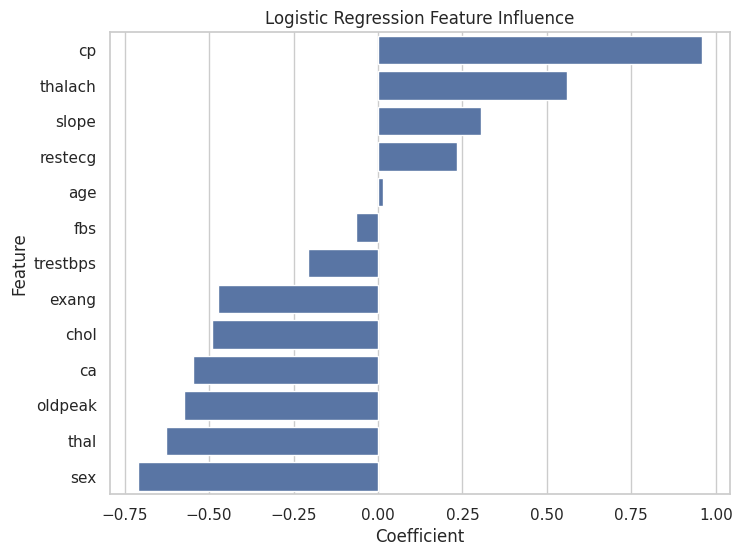

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=lr_coeff)
plt.title("Logistic Regression Feature Influence")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [ ]:
dt_grid.best_params_


{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [ ]:
best_dt_model = dt_grid.best_estimator_


In [ ]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [ ]:
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [ ]:
rf_grid.best_params_


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
best_rf_model = rf_grid.best_estimator_


In [ ]:
nn_params = {
    'hidden_layer_sizes': [(32,), (64,32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}


In [ ]:
nn_grid = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000, random_state=42),
    param_grid=nn_params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

nn_grid.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(32,), (64, 32)]},
             scoring='roc_auc')

In [ ]:
nn_grid.best_params_
best_nn_model = nn_grid.best_estimator_


In [ ]:
# Random Forest (Tuned)
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_prob_rf_tuned = best_rf_model.predict_proba(X_test)[:,1]

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Tuned RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf_tuned))


Tuned RF Accuracy: 0.8360655737704918
Tuned RF ROC-AUC: 0.9080086580086579


In [ ]:
import joblib

# Save the best model (tuned Random Forest)
joblib.dump(best_rf_model, "heart_disease_model.pkl")

# Save the scaler used in preprocessing
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from google.colab import files

files.download("heart_disease_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>